# Exploración Aquí:

Análisis De Datos Exploratorios:

In [1]:
# - Importación De Librerías:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from pickle import dump
import os

# - Importación Del Dataset:

url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv'

# - Guardado:

rutg = '../data/raw/dataset.csv'

# - Lectura:

df = pd.read_csv(url, delimiter=';')
df.to_csv(rutg, index=False)
print("El archivo fue guardado en la ruta:", rutg)

# - Vista Previa:

df

El archivo fue guardado en la ruta: ../data/raw/dataset.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(240)

In [5]:
df = df.drop_duplicates()

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.shape

(1359, 12)

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


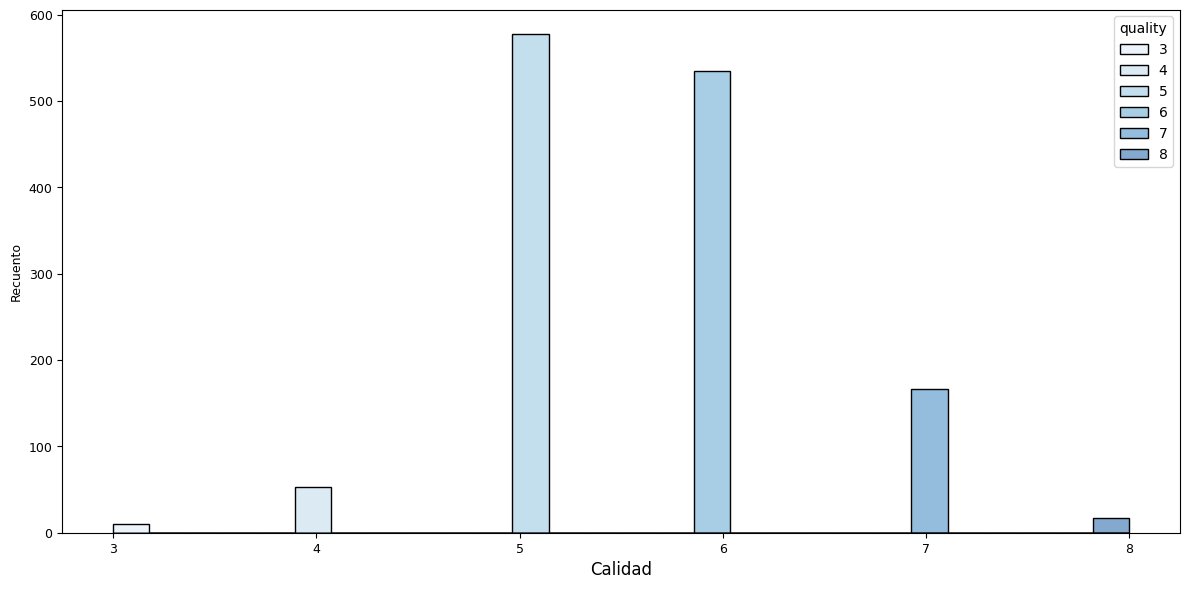

In [9]:
# - Parámetros:

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='quality', hue='quality', palette=sns.color_palette("Blues", 6))
plt.xlabel("Calidad", fontsize=12)
plt.ylabel("Recuento", fontsize=9)
plt.xticks(ticks=sorted(df['quality'].unique()), fontsize=9)
plt.yticks(fontsize=9)

# - Visualización:

plt.tight_layout()
plt.show()

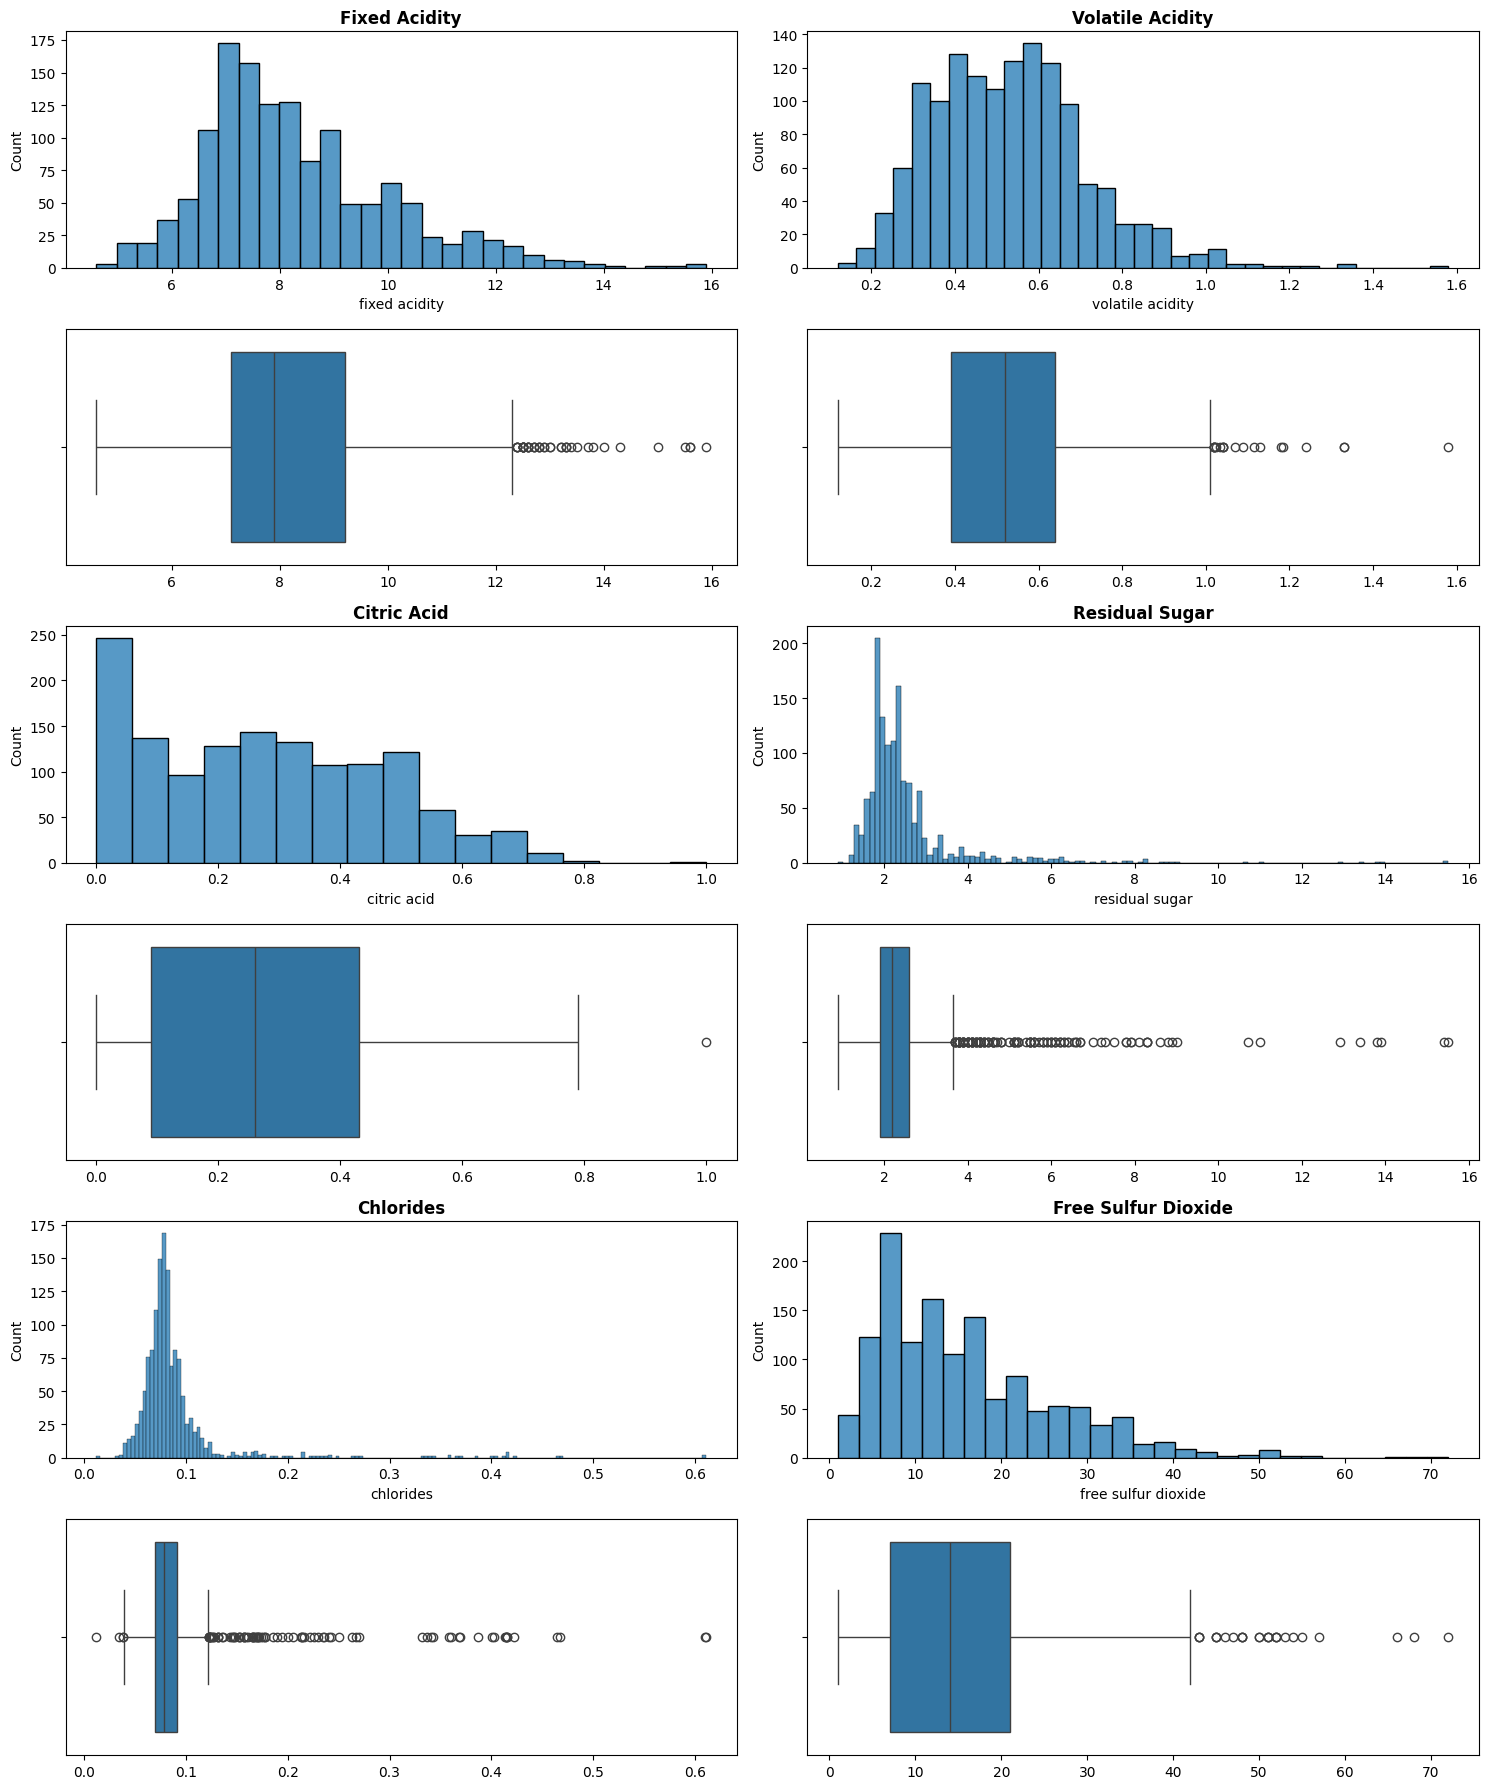

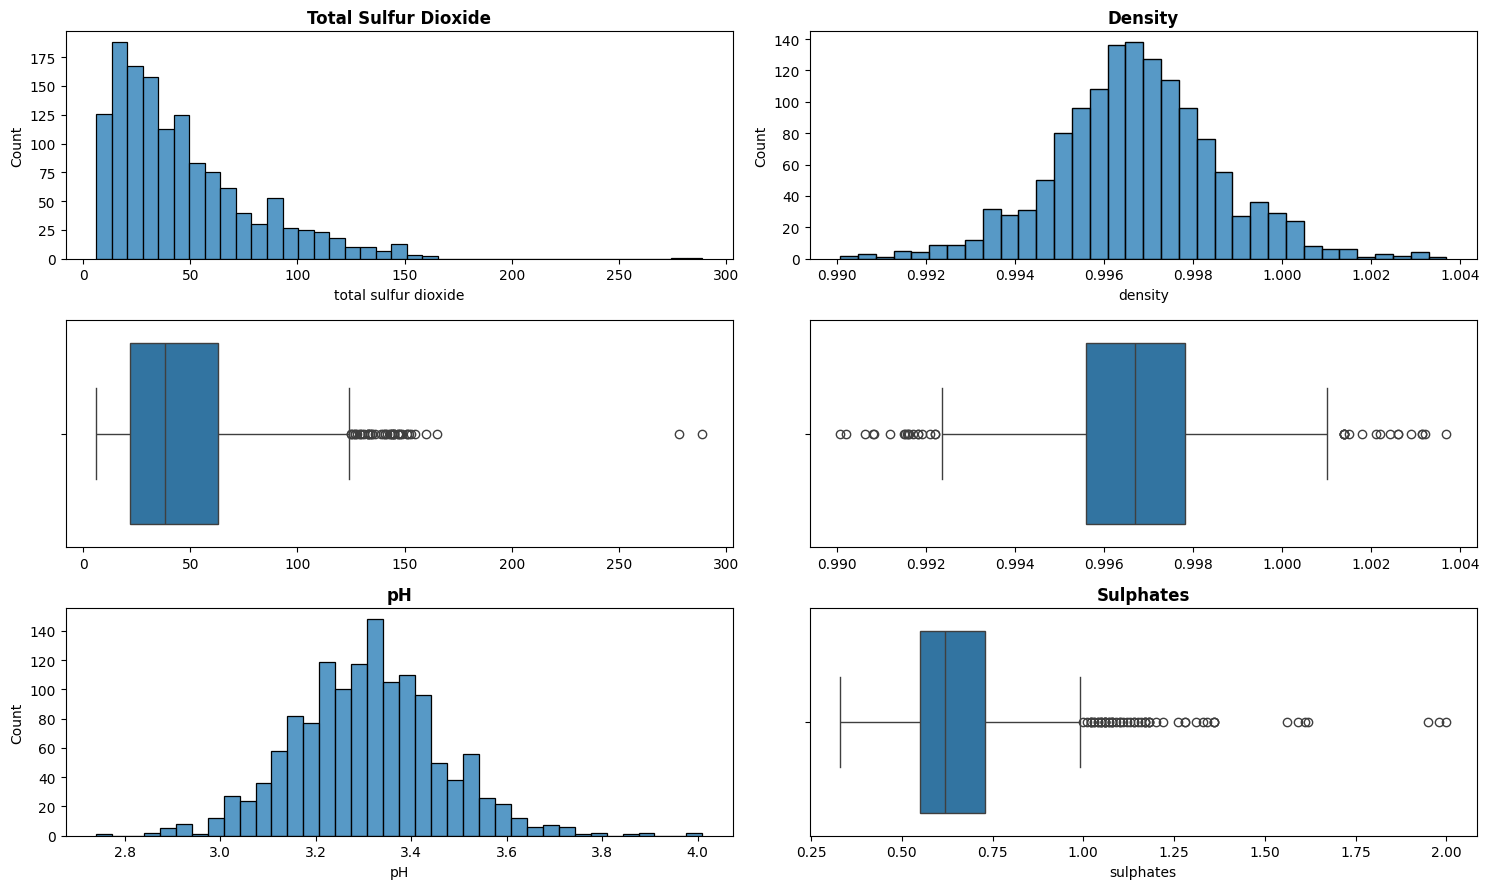

In [10]:
# - Parámetros:

fig, axes = plt.subplots(6, 2, figsize=(15, 18))

# - Distribución:

sns.histplot(ax=axes[0, 0], data=df, x="fixed acidity")
axes[0, 0].set_title("Fixed Acidity", fontweight='bold')
sns.boxplot(ax=axes[1, 0], data=df, x="fixed acidity")
axes[1, 0].set(xlabel=None)

sns.histplot(ax=axes[0, 1], data=df, x="volatile acidity")
axes[0, 1].set_title("Volatile Acidity", fontweight='bold')
sns.boxplot(ax=axes[1, 1], data=df, x="volatile acidity")
axes[1, 1].set(xlabel=None)

sns.histplot(ax=axes[2, 0], data=df, x="citric acid")
axes[2, 0].set_title("Citric Acid", fontweight='bold')
sns.boxplot(ax=axes[3, 0], data=df, x="citric acid")
axes[3, 0].set(xlabel=None)

sns.histplot(ax=axes[2, 1], data=df, x="residual sugar")
axes[2, 1].set_title("Residual Sugar", fontweight='bold')
sns.boxplot(ax=axes[3, 1], data=df, x="residual sugar")
axes[3, 1].set(xlabel=None)

sns.histplot(ax=axes[4, 0], data=df, x="chlorides")
axes[4, 0].set_title("Chlorides", fontweight='bold')
sns.boxplot(ax=axes[5, 0], data=df, x="chlorides")
axes[5, 0].set(xlabel=None)

sns.histplot(ax=axes[4, 1], data=df, x="free sulfur dioxide")
axes[4, 1].set_title("Free Sulfur Dioxide", fontweight='bold')
sns.boxplot(ax=axes[5, 1], data=df, x="free sulfur dioxide")
axes[5, 1].set(xlabel=None)

# - Parámetros:

fig2, axes2 = plt.subplots(3, 2, figsize=(15, 9))

# - Distribución:

sns.histplot(ax=axes2[0, 0], data=df, x="total sulfur dioxide")
axes2[0, 0].set_title("Total Sulfur Dioxide", fontweight='bold')
sns.boxplot(ax=axes2[1, 0], data=df, x="total sulfur dioxide")
axes2[1, 0].set(xlabel=None)

sns.histplot(ax=axes2[0, 1], data=df, x="density")
axes2[0, 1].set_title("Density", fontweight='bold')
sns.boxplot(ax=axes2[1, 1], data=df, x="density")
axes2[1, 1].set(xlabel=None)

sns.histplot(ax=axes2[2, 0], data=df, x="pH")
axes2[2, 0].set_title("pH", fontweight='bold')
sns.boxplot(ax=axes2[2, 1], data=df, x="sulphates")
axes2[2, 1].set_title("Sulphates", fontweight='bold')

# - Visualización:

plt.tight_layout()
fig.tight_layout()
fig2.tight_layout()
plt.show()

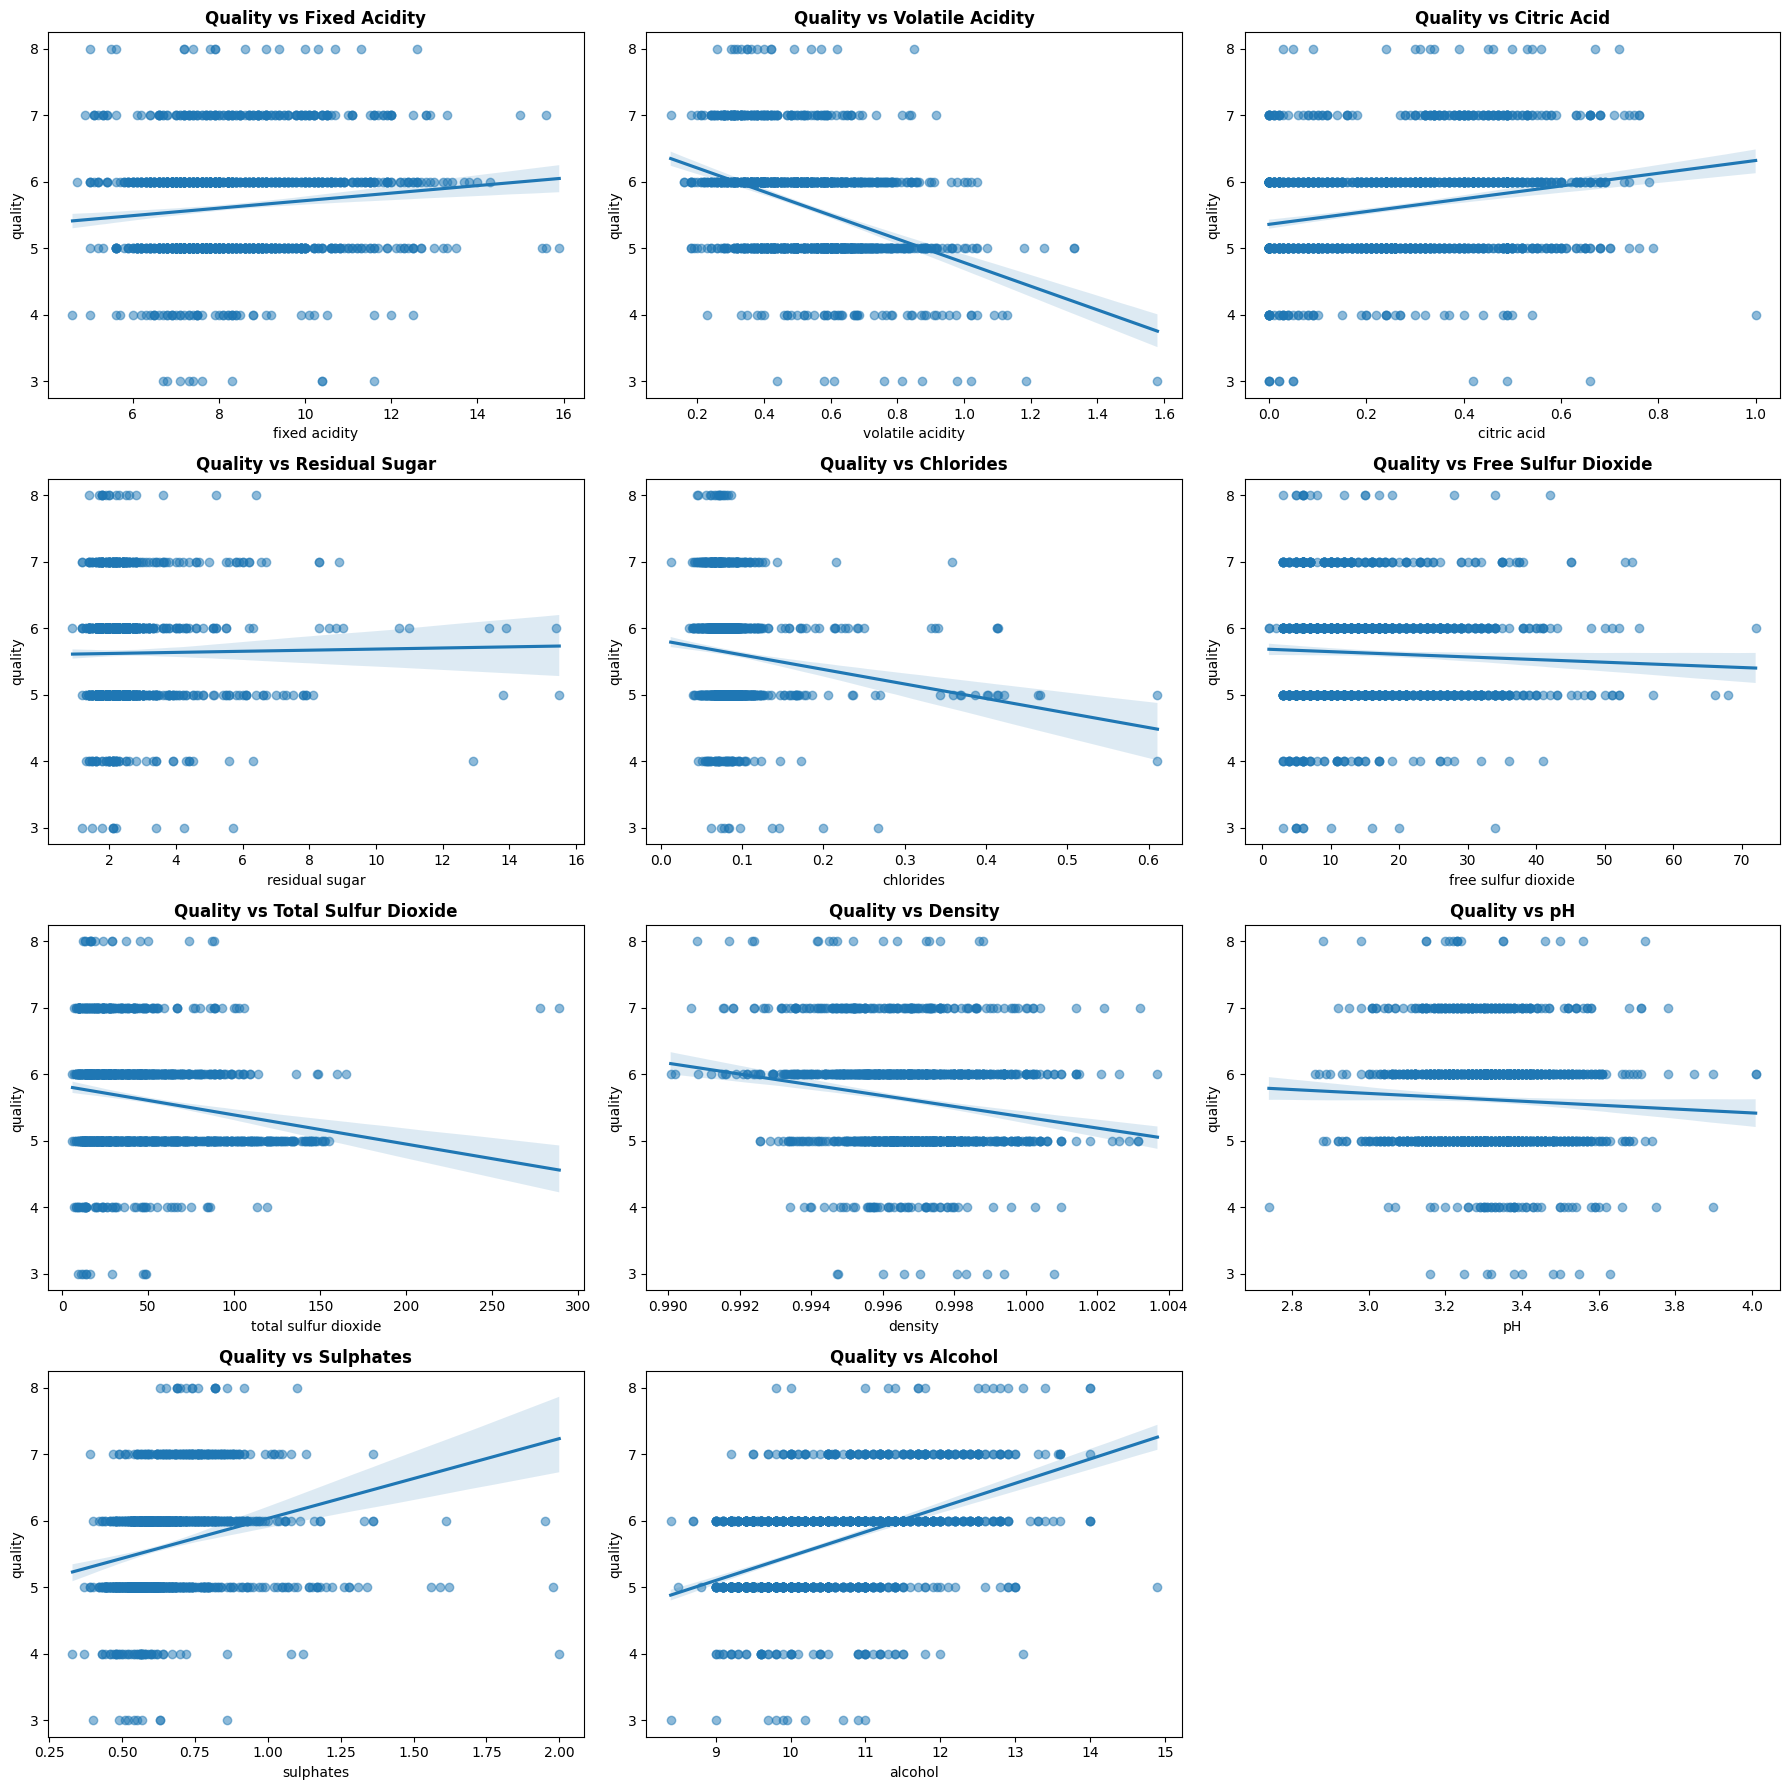

In [11]:
# - Parámetros:

fig, axes = plt.subplots(4, 3, figsize=(18, 18))

# - Distribución:

sns.regplot(data=df, x="fixed acidity", y="quality", scatter_kws={'alpha': 0.5}, ax=axes[0, 0])
axes[0, 0].set_title("Quality vs Fixed Acidity", fontweight='bold')
sns.regplot(data=df, x="volatile acidity", y="quality", scatter_kws={'alpha': 0.5}, ax=axes[0, 1])
axes[0, 1].set_title("Quality vs Volatile Acidity", fontweight='bold')
sns.regplot(data=df, x="citric acid", y="quality", scatter_kws={'alpha': 0.5}, ax=axes[0, 2])
axes[0, 2].set_title("Quality vs Citric Acid", fontweight='bold')
sns.regplot(data=df, x="residual sugar", y="quality", scatter_kws={'alpha': 0.5}, ax=axes[1, 0])
axes[1, 0].set_title("Quality vs Residual Sugar", fontweight='bold')
sns.regplot(data=df, x="chlorides", y="quality", scatter_kws={'alpha': 0.5}, ax=axes[1, 1])
axes[1, 1].set_title("Quality vs Chlorides", fontweight='bold')
sns.regplot(data=df, x="free sulfur dioxide", y="quality", scatter_kws={'alpha': 0.5}, ax=axes[1, 2])
axes[1, 2].set_title("Quality vs Free Sulfur Dioxide", fontweight='bold')
sns.regplot(data=df, x="total sulfur dioxide", y="quality", scatter_kws={'alpha': 0.5}, ax=axes[2, 0])
axes[2, 0].set_title("Quality vs Total Sulfur Dioxide", fontweight='bold')
sns.regplot(data=df, x="density", y="quality", scatter_kws={'alpha': 0.5}, ax=axes[2, 1])
axes[2, 1].set_title("Quality vs Density", fontweight='bold')
sns.regplot(data=df, x="pH", y="quality", scatter_kws={'alpha': 0.5}, ax=axes[2, 2])
axes[2, 2].set_title("Quality vs pH", fontweight='bold')
sns.regplot(data=df, x="sulphates", y="quality", scatter_kws={'alpha': 0.5}, ax=axes[3, 0])
axes[3, 0].set_title("Quality vs Sulphates", fontweight='bold')
sns.regplot(data=df, x="alcohol", y="quality", scatter_kws={'alpha': 0.5}, ax=axes[3, 1])
axes[3, 1].set_title("Quality vs Alcohol", fontweight='bold')
axes[3, 2].axis('off')

# - Visualización:

plt.tight_layout()
plt.show()


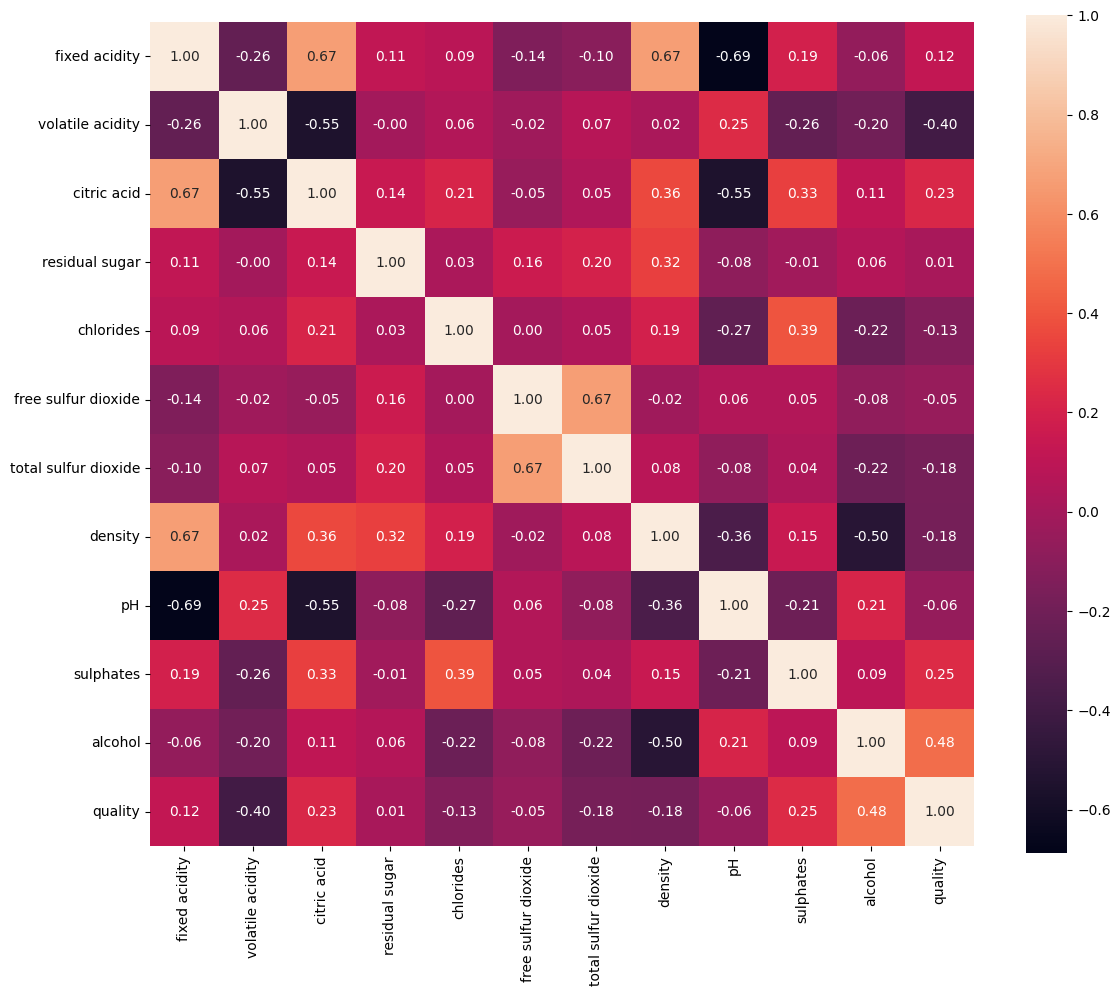

In [12]:
variables = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol',
    'quality'
            ]

# - Parámetros:

corr_matrix = df[variables].corr()
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", square=True)

# - Visualización:

plt.tight_layout()
plt.show()

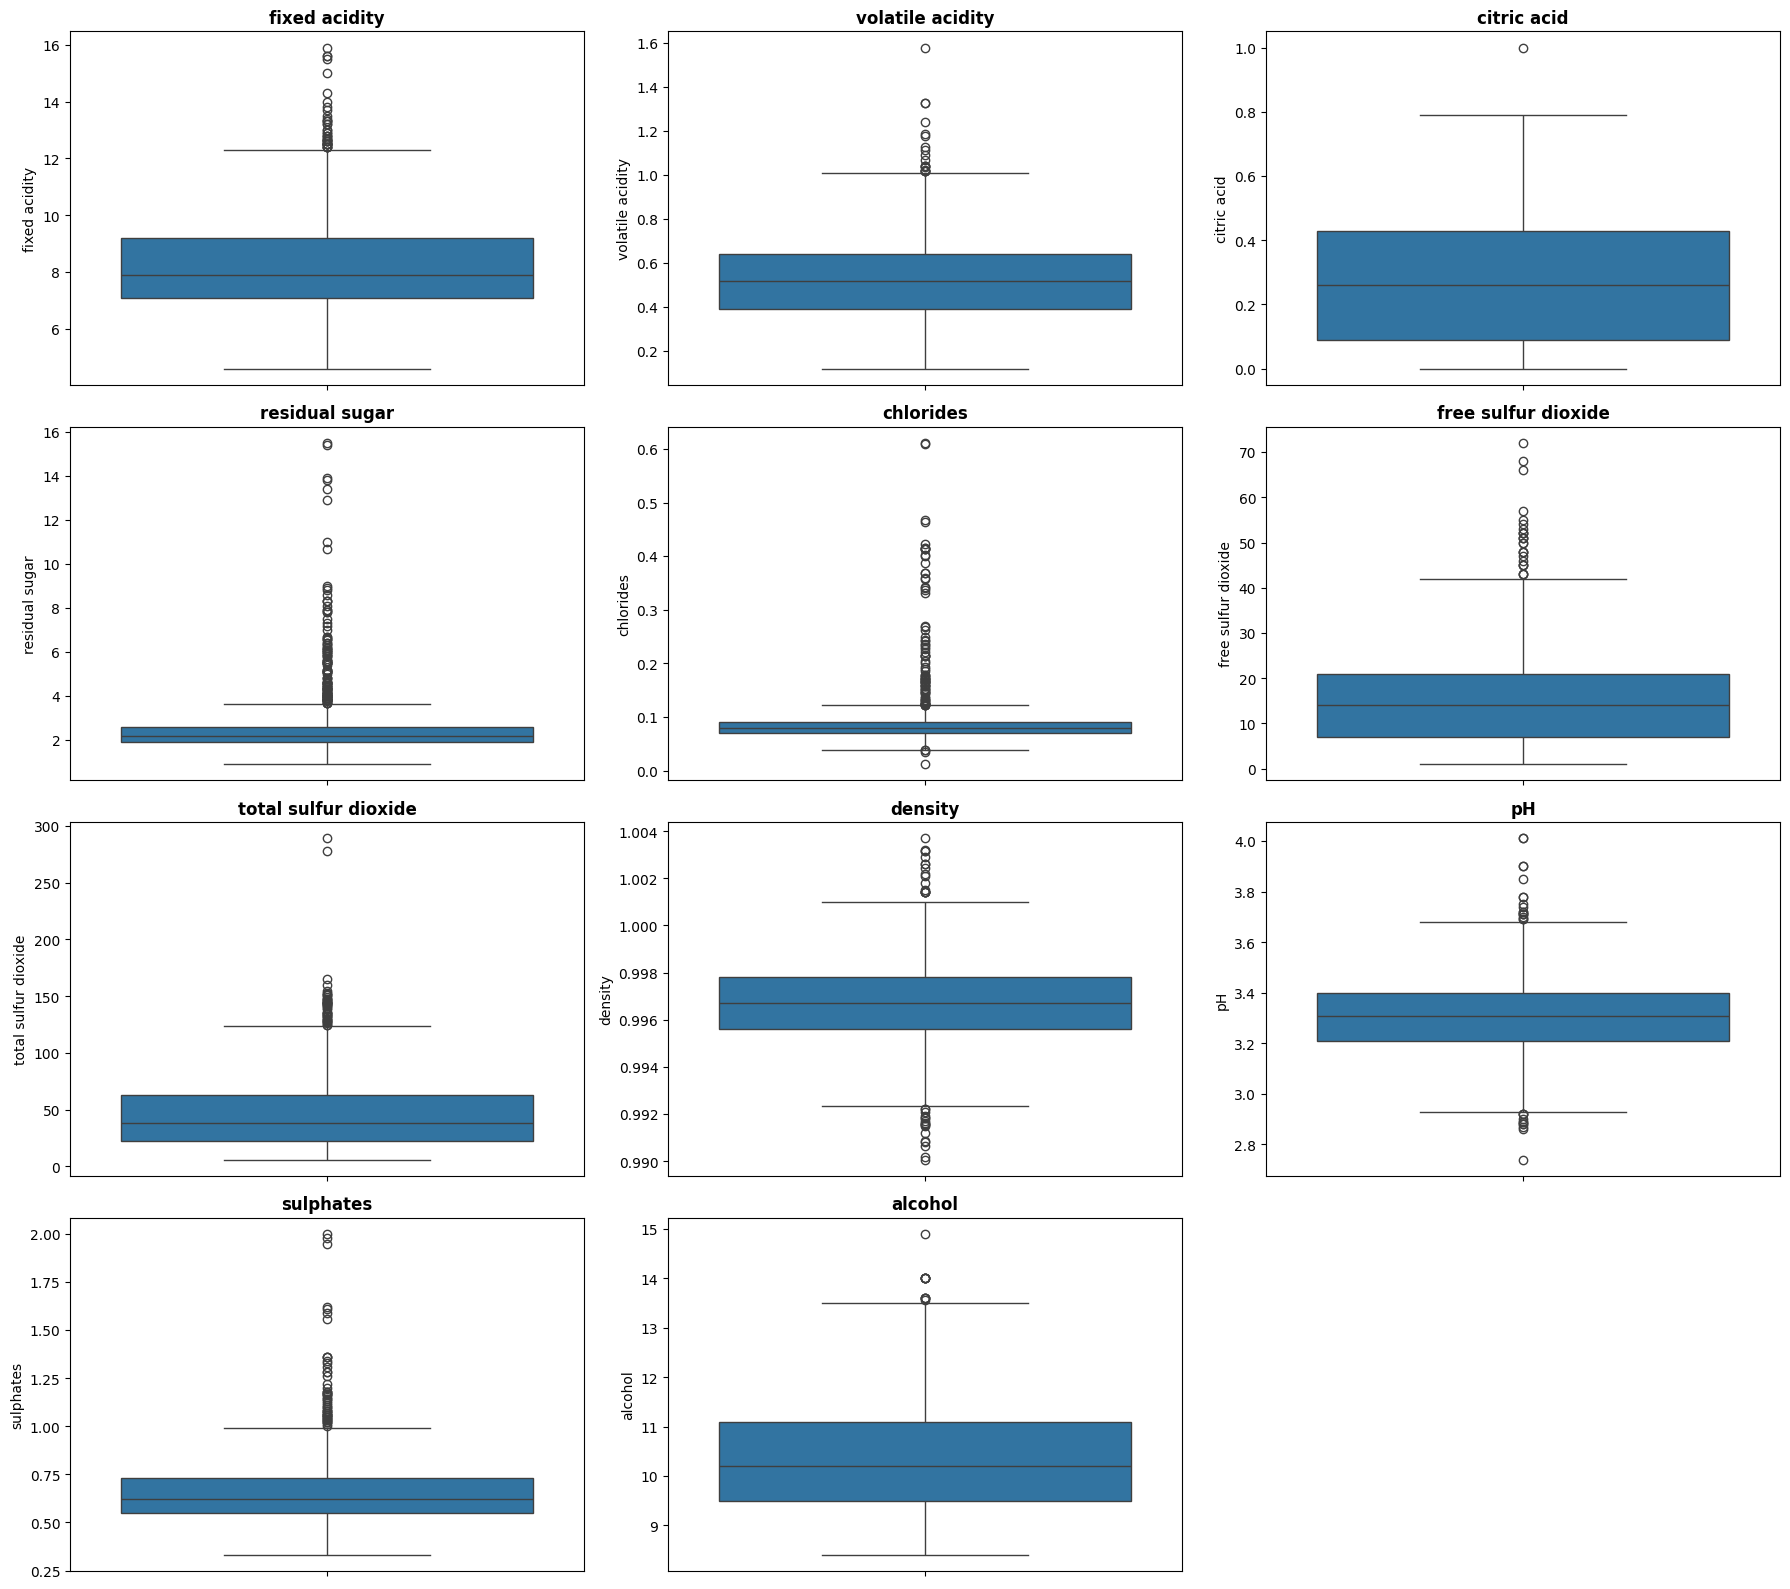

In [13]:
# - Parámetros:

fig, axes = plt.subplots(4, 3, figsize=(18, 16))

# - Distribución:

sns.boxplot(data=df, y="fixed acidity", ax=axes[0, 0])
axes[0, 0].set_title("fixed acidity", fontweight='bold')
sns.boxplot(data=df, y="volatile acidity", ax=axes[0, 1])
axes[0, 1].set_title("volatile acidity", fontweight='bold')
sns.boxplot(data=df, y="citric acid", ax=axes[0, 2])
axes[0, 2].set_title("citric acid", fontweight='bold')
sns.boxplot(data=df, y="residual sugar", ax=axes[1, 0])
axes[1, 0].set_title("residual sugar", fontweight='bold')
sns.boxplot(data=df, y="chlorides", ax=axes[1, 1])
axes[1, 1].set_title("chlorides", fontweight='bold')
sns.boxplot(data=df, y="free sulfur dioxide", ax=axes[1, 2])
axes[1, 2].set_title("free sulfur dioxide", fontweight='bold')
sns.boxplot(data=df, y="total sulfur dioxide", ax=axes[2, 0])
axes[2, 0].set_title("total sulfur dioxide", fontweight='bold')
sns.boxplot(data=df, y="density", ax=axes[2, 1])
axes[2, 1].set_title("density", fontweight='bold')
sns.boxplot(data=df, y="pH", ax=axes[2, 2])
axes[2, 2].set_title("pH", fontweight='bold')
sns.boxplot(data=df, y="sulphates", ax=axes[3, 0])
axes[3, 0].set_title("sulphates", fontweight='bold')
sns.boxplot(data=df, y="alcohol", ax=axes[3, 1])
axes[3, 1].set_title("alcohol", fontweight='bold')
axes[3, 2].axis('off')

# - Visualización:

plt.tight_layout()
plt.show()

In [14]:
for var in variables:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[var].median()
    df.loc[df[var] < lower_bound, var] = median
    df.loc[df[var] > upper_bound, var] = median

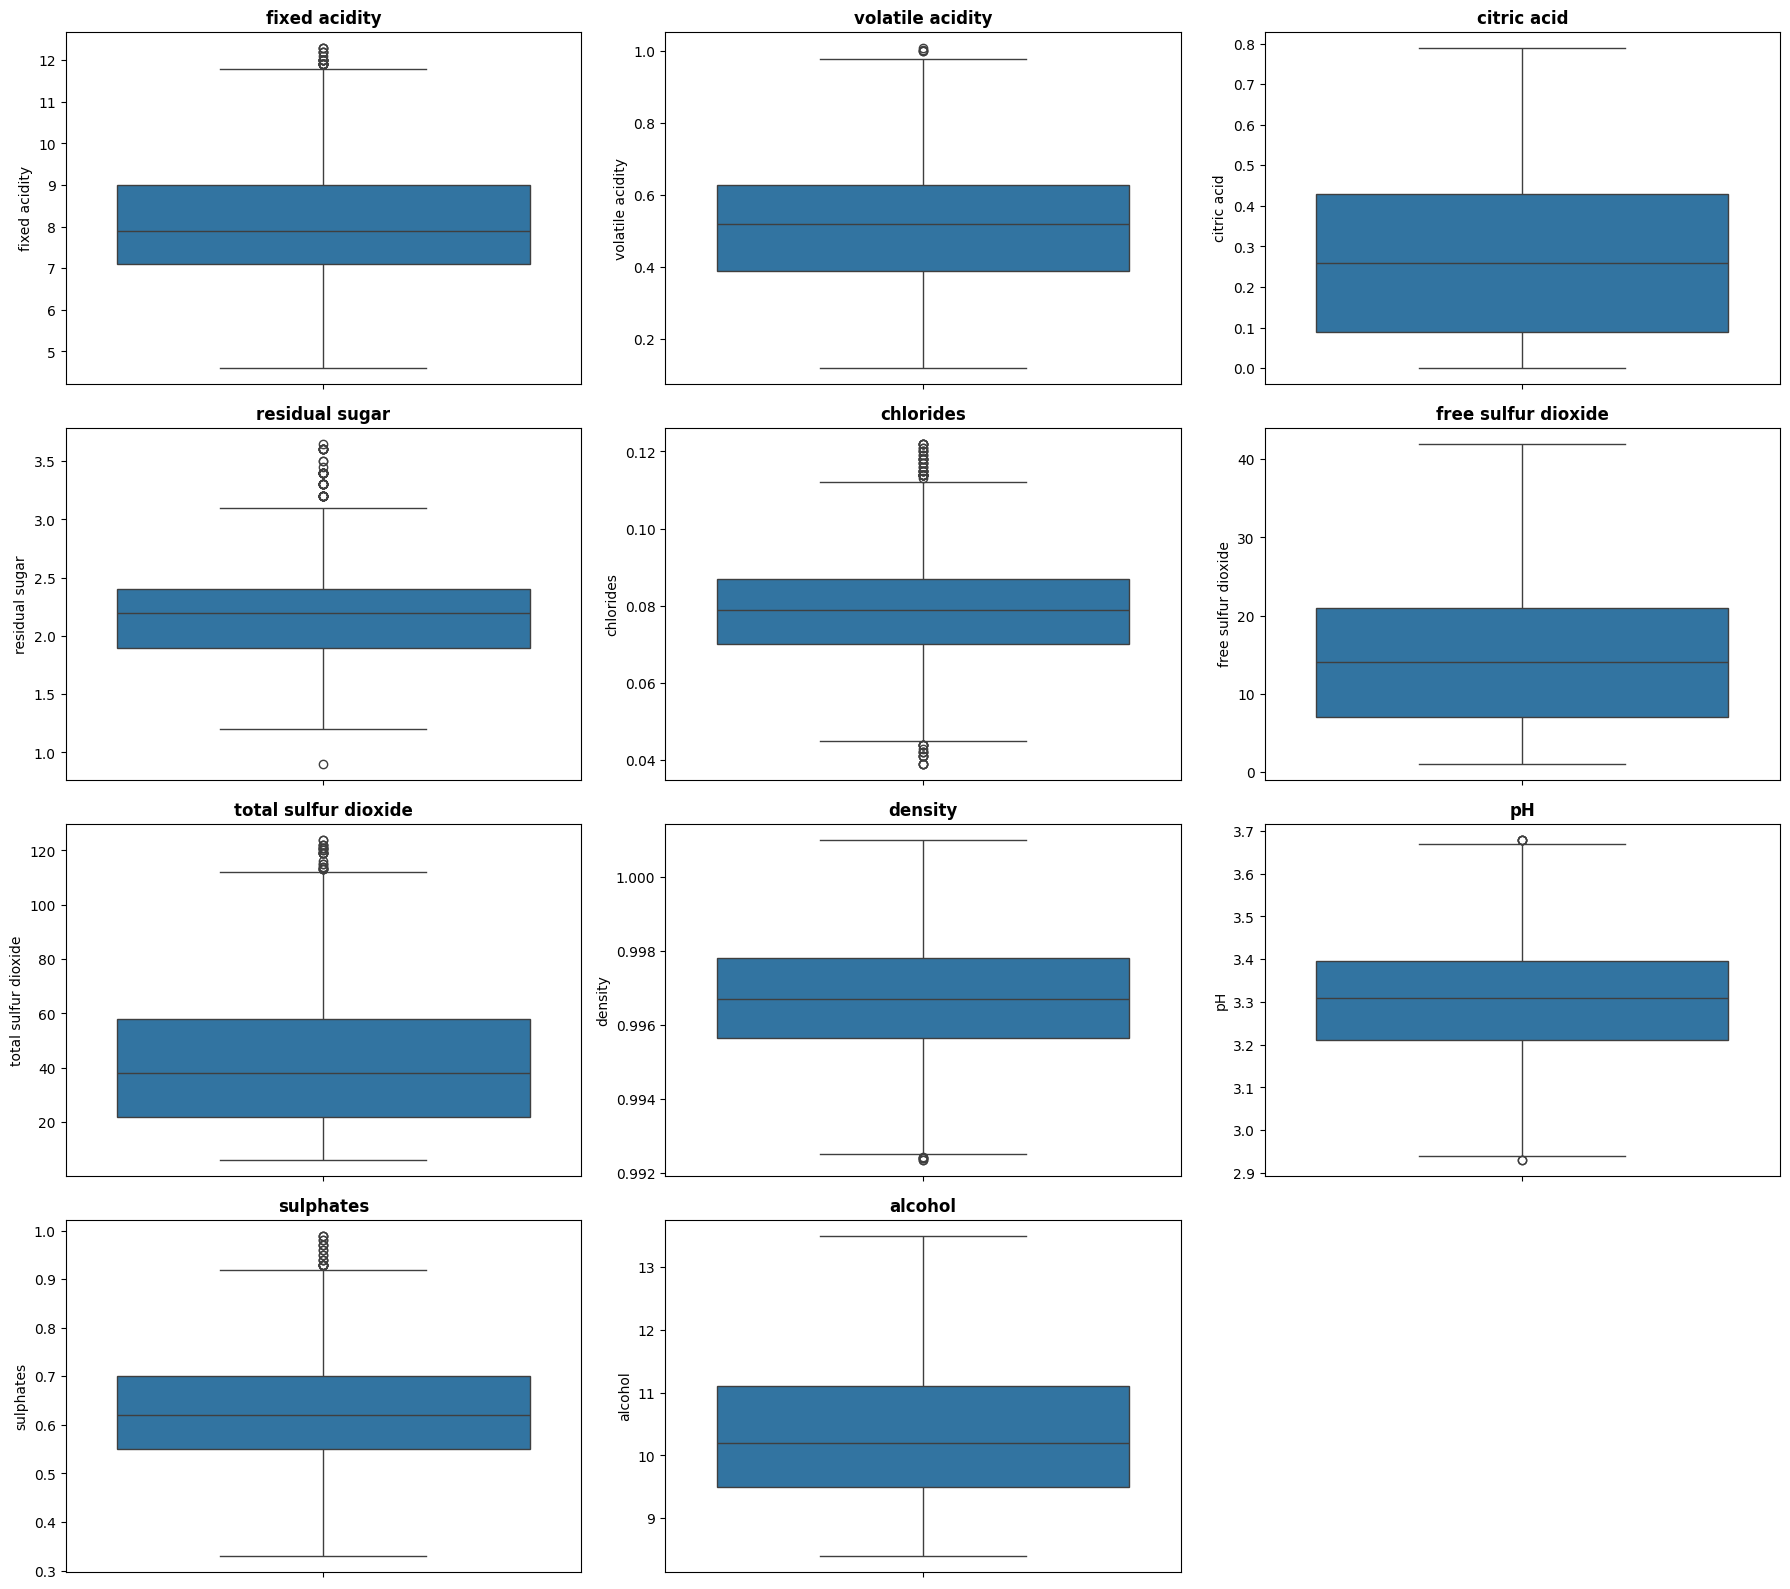

In [15]:
# - Parámetros:

fig, axes = plt.subplots(4, 3, figsize=(18, 16))

# - Distribución:

sns.boxplot(data=df, y="fixed acidity", ax=axes[0, 0])
axes[0, 0].set_title("fixed acidity", fontweight='bold')
sns.boxplot(data=df, y="volatile acidity", ax=axes[0, 1])
axes[0, 1].set_title("volatile acidity", fontweight='bold')
sns.boxplot(data=df, y="citric acid", ax=axes[0, 2])
axes[0, 2].set_title("citric acid", fontweight='bold')
sns.boxplot(data=df, y="residual sugar", ax=axes[1, 0])
axes[1, 0].set_title("residual sugar", fontweight='bold')
sns.boxplot(data=df, y="chlorides", ax=axes[1, 1])
axes[1, 1].set_title("chlorides", fontweight='bold')
sns.boxplot(data=df, y="free sulfur dioxide", ax=axes[1, 2])
axes[1, 2].set_title("free sulfur dioxide", fontweight='bold')
sns.boxplot(data=df, y="total sulfur dioxide", ax=axes[2, 0])
axes[2, 0].set_title("total sulfur dioxide", fontweight='bold')
sns.boxplot(data=df, y="density", ax=axes[2, 1])
axes[2, 1].set_title("density", fontweight='bold')
sns.boxplot(data=df, y="pH", ax=axes[2, 2])
axes[2, 2].set_title("pH", fontweight='bold')
sns.boxplot(data=df, y="sulphates", ax=axes[3, 0])
axes[3, 0].set_title("sulphates", fontweight='bold')
sns.boxplot(data=df, y="alcohol", ax=axes[3, 1])
axes[3, 1].set_title("alcohol", fontweight='bold')
axes[3, 2].axis('off')

# - Visualización:

plt.tight_layout()
plt.show()

In [16]:
df.shape

(1359, 12)

Este modelo es sensible a valores atípicos, por lo que se decidió que era necesario reemplazarlos por la mediana, si se eliminaban, se perdería alrededor de un 28% de los datos, lo que es un valor demasiado alto.

In [17]:
# - Selección:

X = df.drop('quality', axis=1)
y = df['quality']

# - División:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# - Estandarización:

scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_norm = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [18]:
X_train_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1016,0.525078,-0.851740,0.656454,-0.000845,-0.745575,-0.338003,-0.555109,-1.119053,-0.279154,1.000670,2.132201
1519,-1.037530,1.082700,-0.992694,0.917664,1.796878,-0.116138,-0.591289,-0.033946,0.950813,-0.466318,-0.191796
452,-0.901651,0.236383,-1.250373,-1.148981,0.324931,0.327594,-0.301852,0.056984,0.950813,-0.034851,-0.385462
847,-0.494014,0.961798,-0.580407,-0.919354,-0.076509,-0.338003,-0.157133,0.602569,1.384919,0.569203,-0.482295
58,-0.222256,0.417736,-0.477335,0.228782,-0.210322,0.216661,0.385561,0.481328,0.878462,-0.380024,-0.385462
...,...,...,...,...,...,...,...,...,...,...,...
1285,2.155625,-0.912191,1.171813,-0.919354,0.726371,0.549460,0.132304,0.384335,-1.147365,-0.552611,0.098704
1329,-0.494014,0.478188,-0.065048,-0.230472,0.258025,0.216661,1.724207,-0.330987,-0.134452,-0.638904,-0.579128
1526,-0.901651,-0.307678,-0.992694,-0.000845,-1.013202,0.327594,-0.193313,-0.712896,-0.062101,0.137736,-0.772795
1011,0.525078,-1.214447,0.192631,-0.460099,0.592558,-0.338003,-0.880726,-0.609841,-1.002663,-0.725198,0.001871


In [19]:
X_test_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
55,-0.290196,0.599090,-1.198837,-0.000845,0.324931,1.104124,0.059944,0.663189,0.227303,-0.897785,-0.869628
1291,0.049501,0.689767,-0.889622,-0.230472,-0.411042,1.104124,0.602639,-0.197622,-0.134452,1.000670,0.486037
1544,0.185380,-0.912191,0.811062,0.228782,-1.080109,-0.338003,-0.880726,-0.731082,-1.002663,1.518430,0.776536
593,1.204472,-0.186776,1.584100,2.984308,0.993998,-0.670802,-0.012415,2.239322,-0.134452,-0.466318,-1.353794
1261,-1.241348,-0.005422,-1.404981,-0.460099,0.258025,0.216661,-0.699828,-1.416094,2.036078,-0.725198,0.776536
...,...,...,...,...,...,...,...,...,...,...,...
1086,0.253320,-1.093545,0.656454,-0.000845,-1.615362,-1.336400,-1.242522,0.408583,0.516707,0.224029,1.163869
662,-0.629893,0.296834,-1.095766,-1.378608,-0.210322,-0.670802,-0.591289,0.299466,0.372005,0.569203,-0.772795
279,0.525078,-0.730837,0.244167,-0.000845,0.525651,-0.559869,0.132304,1.451256,0.516707,1.173256,0.098704
1111,-1.852804,-0.609935,-0.013512,-0.460099,0.860184,0.882258,0.421741,-1.209984,0.010250,0.051443,1.841702


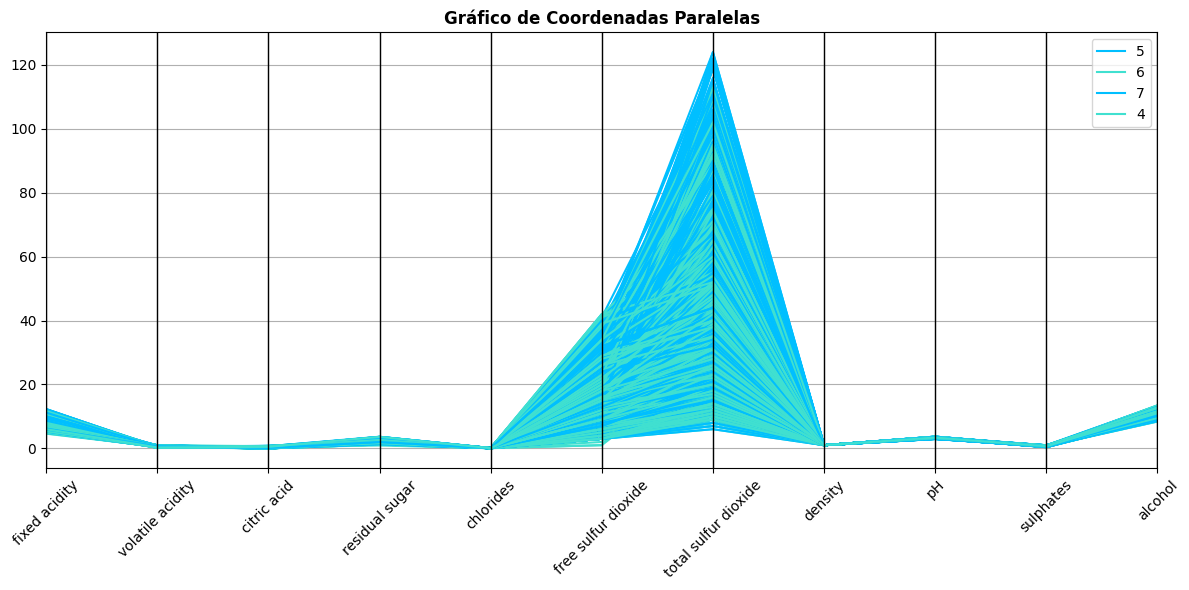

In [20]:
# - Parámetros:

total_data = X.copy()
total_data["Name"] = y

# - Distribución:

plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(
    total_data,
    "Name",
    color=["#00BFFF", "#40E0D0"]
)
plt.title("Gráfico de Coordenadas Paralelas", fontweight='bold')
plt.xticks(rotation=45)

# - Visualización:

plt.tight_layout()
plt.show()

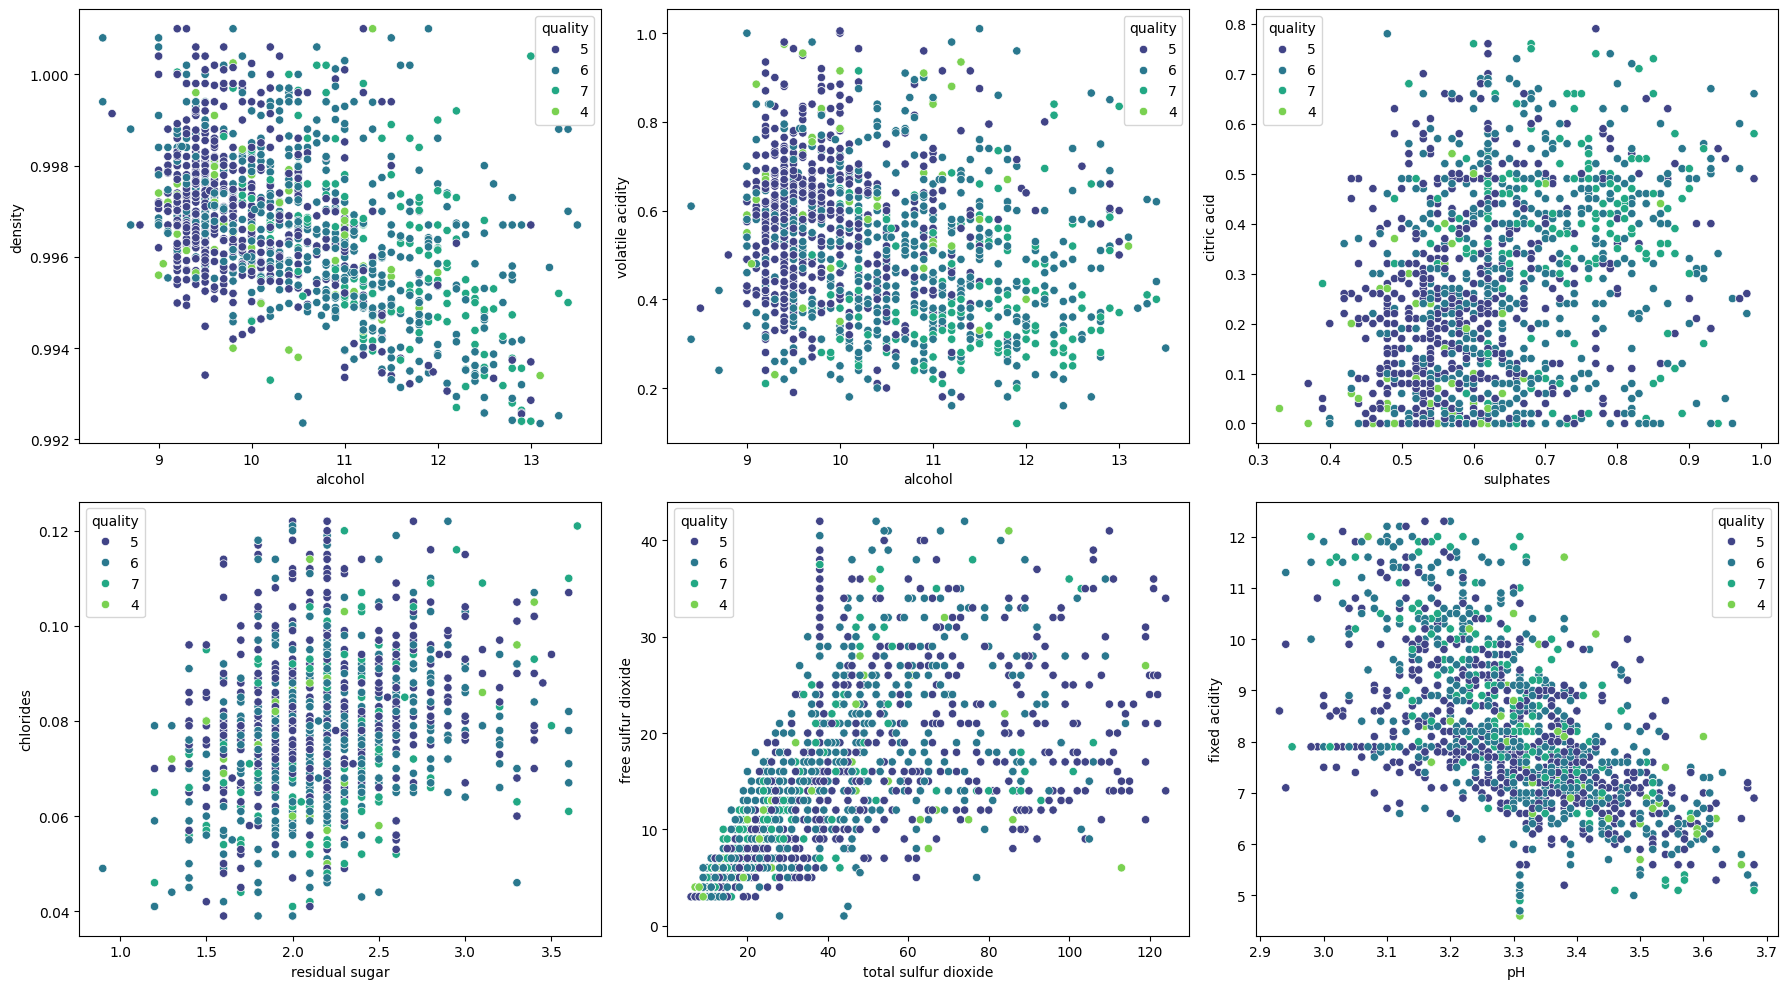

In [21]:
# - Parámetros:

fig, axis = plt.subplots(2, 3, figsize=(18, 10))
palette = sns.color_palette("viridis", as_cmap=False, n_colors=df['quality'].nunique())

# - Dispersión:

sns.scatterplot(ax=axis[0, 0], data=df, x='alcohol', y='density', hue=df['quality'].astype(str), palette=palette)
sns.scatterplot(ax=axis[0, 1], data=df, x='alcohol', y='volatile acidity', hue=df['quality'].astype(str), palette=palette)
sns.scatterplot(ax=axis[0, 2], data=df, x='sulphates', y='citric acid', hue=df['quality'].astype(str), palette=palette)
sns.scatterplot(ax=axis[1, 0], data=df, x='residual sugar', y='chlorides', hue=df['quality'].astype(str), palette=palette)
sns.scatterplot(ax=axis[1, 1], data=df, x='total sulfur dioxide', y='free sulfur dioxide', hue=df['quality'].astype(str), palette=palette)
sns.scatterplot(ax=axis[1, 2], data=df, x='pH', y='fixed acidity', hue=df['quality'].astype(str), palette=palette)

# - Visualización:

plt.tight_layout()
plt.show()

In [22]:
fig = px.scatter_3d(
    df,
    x='alcohol',
    y='density',
    z='fixed acidity',
    color=df['quality'].astype(str),
    size=df['alcohol'].abs(),
    width=1000,
    height=500,
    color_discrete_sequence=px.colors.qualitative.Vivid
)

camera = dict(
    up=dict(x=0, y=1, z=0.5),
    eye=dict(x=1.2, y=1.2, z=0.6)
)

fig.update_layout(scene_camera=camera)
fig.show()

K-Neighbors:

Coeficiente De Determinación: 0.5404411764705882

Reporte De Clasificación:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.62      0.65      0.64       120
           6       0.49      0.60      0.54       110
           7       0.27      0.10      0.14        31

    accuracy                           0.54       272
   macro avg       0.35      0.34      0.33       272
weighted avg       0.50      0.54      0.51       272



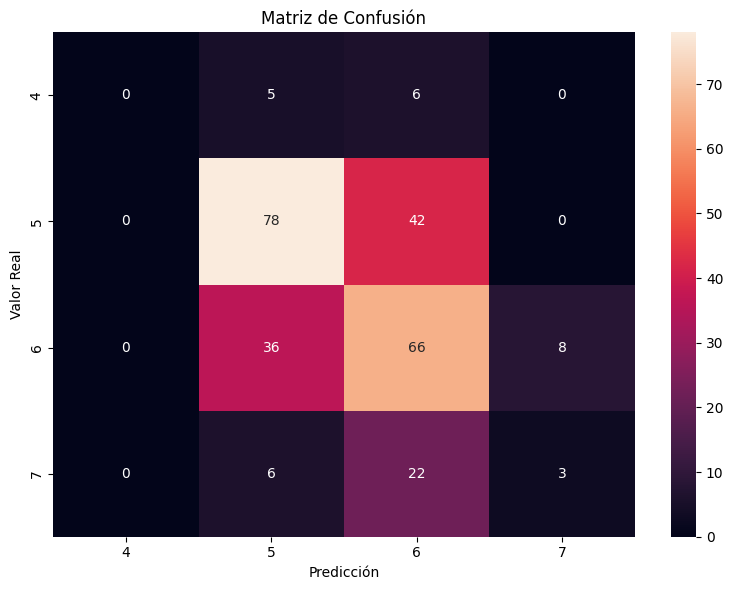

In [27]:
model = KNeighborsClassifier(n_neighbors=20, p=1, weights='distance', algorithm='auto', metric='hamming')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

print("Coeficiente De Determinación:", acc)
print("\nReporte De Clasificación:\n", report)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()

In [28]:
dump(model, open("../models/knn_classifier_tuned.sav", "wb"))

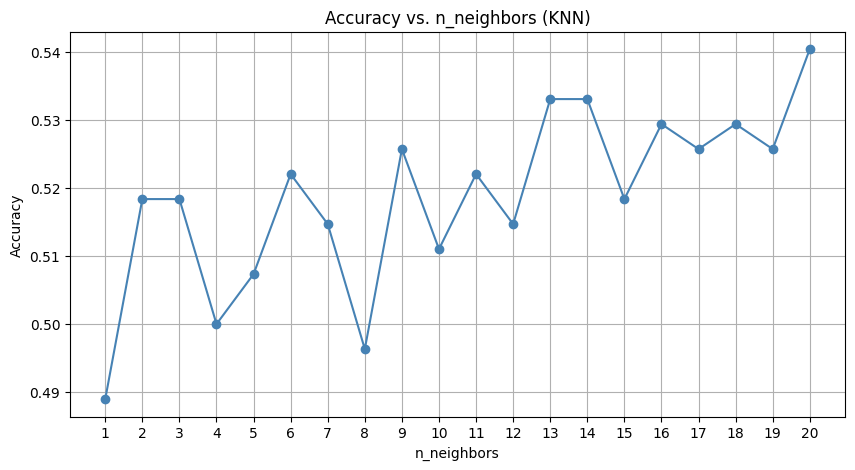

In [29]:
accuracies = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k, p=1, weights='distance', algorithm='auto', metric='hamming')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), accuracies, marker='o', linestyle='-', color='steelblue')
plt.title('Accuracy vs. n_neighbors (KNN)')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(1, 21))
plt.show()

In [30]:
def predict_wine_quality(input_values):
    
    # - Variables Predictoras:
    
    feature_names = [
        'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
    ]
    
    # - Creación Del DataFrame Simulador De Y_Test:
    
    new_sample = pd.DataFrame([input_values], columns=feature_names)
    
    # - Escalado:
    
    new_sample_scaled = scaler.transform(new_sample)
    
    # - Predicción:
    
    prediction = model.predict(new_sample_scaled)[0]

    # - Interpretación:
    
    if prediction <= 4:
        return f"Este vino probablemente sea de calidad baja - Puntuación: {prediction}"
    elif prediction <= 6:
        return f"Este vino probablemente sea de calidad media - Puntuación: {prediction}"
    else:
        return f"Este vino probablemente sea de calidad alta - Puntuación: {prediction}"

In [31]:
predict_wine_quality([7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4])

d:\Users\luism\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



'Este vino probablemente sea de calidad media - Puntuación: 5'

Después de varios esfuerzos, la precisión que se puede observar arriba es el mayor valor al que se llegó después de experimentar con los hiperparámetros, además de reemplazar valores atípicos con la mediana, e inclusive pedirle asistencia a la IA, se infiere, que no es posible alcanzar mayor precisión a menos que hayan más datos.